In [50]:
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP/Live Lectures Material DLCVNLP April 17th batch/Day 06 May 16/Day 05 updated code"

In [51]:
import os
os.chdir(ROOT)

In [52]:
os.getcwd()

'/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP/Live Lectures Material DLCVNLP April 17th batch/Day 06 May 16/Day 05 updated code'

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

# plt.style.use("fivethirtyeight")

In [54]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs

  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights)
    return np.where(z > 0 , 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [55]:
# discarded
# activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0 , 1, 0)

```python
def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  y_hat = np.where(z > 0, 1, 0)
  return y_hat

def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  if z > 0:
    y_hat = 1
  else:
    y_hat = 0
  return y_hat


```

# AND

In [56]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

In [57]:
X = AND.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

In [58]:
y = AND['y']
y.to_frame()

y
0  0
1  0
2  0
3  1

In [59]:
# model = Perceptron(eta = 0.5, epochs=10, activationFunction=activationFunction)
model = Perceptron(eta = 0.5, epochs=10)

self.weights: [2.38015314e-05 4.99934599e-05 8.48163963e-05]


In [60]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 0.5000238   0.50004999 -0.49991518]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[2.38015314e-05 4.99934599e-05 1.00008482e+00]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.5000238  0.50004999 0.50008482]
#############

for epoch: 3
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.5000238  0.50004999 0.50008482]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.5000238  0.50004999 0.50008482]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    

In [61]:
model.predict(X)

array([0, 0, 0, 1])

## save and load model

In [62]:


filename = 'AND_model.model'
joblib.dump(model, filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


# OR

In [63]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

In [64]:
X = OR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

In [65]:
y = OR['y']
y.to_frame()

y
0  0
1  1
2  1
3  1

In [66]:
model = Perceptron(eta = 0.5, epochs=10)

self.weights: [-1.49820803e-04 -3.57505324e-05 -5.96927611e-05]


In [67]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 0 0]
error: 
0   -1
1    0
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 0.99985018  0.49996425 -0.50005969]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 9.99850179e-01  4.99964249e-01 -5.96927611e-05]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.99985018 0.49996425 0.49994031]
#############

for epoch: 3
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.99985018 0.49996425 0.49994031]
#############

for epoch: 4
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.99985018 0.49996425 0.49994031]
#############

for epoch: 5
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3 

# XOR

In [68]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

In [69]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

In [70]:
y = XOR['y']
y.to_frame()

y
0  0
1  1
2  1
3  0

In [71]:
model = Perceptron(eta = 0.5, epochs=50)


self.weights: [-1.86524490e-04  6.59613221e-05 -2.30704379e-05]


In [72]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 0 0]
error: 
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99813476e-01  6.59613221e-05 -2.30704379e-05]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-1.86524490e-04 -4.99934039e-01  9.99976930e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99813476e-01  6.59613221e-05 -2.30704379e-05]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-1.86524490e-04 -4.99934039e-01  9.99976930e-01]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99813476e-01  6.59613221e-05 -2.30704379e-05]
#############

for epoch: 5
pr

In [73]:
model.predict(X)

array([0, 0, 0, 0])

# Analysis with the graph

### AND GATE

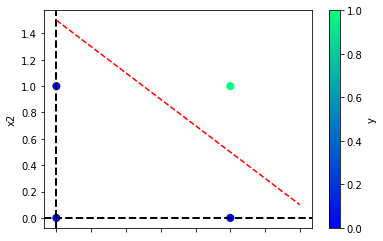

In [74]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50 
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50 

plt.plot(x, y, "r--")

### OR

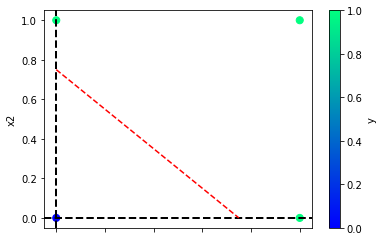

In [75]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

# XOR

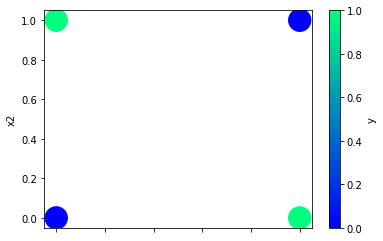

In [76]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")
